In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import pickle
import csv

In [51]:
#helper functions
def gaussianPlot(ytrue, title='Gaussian Plot for the predicted test values'):
  plt.figure(figsize=(12, 12))
  sns.distplot(ytrue, hist=True, color='g')
  plt.title(title)


In [52]:
test_features = pd.read_csv('test_features.csv')
#CREATE DATASET WITH one hot encoded LABELS
jobIDs = test_features['jobId'].values.tolist()
test_features = test_features.drop(['jobId', 'companyId'], axis = 1)
test_data_encoded = pd.get_dummies(test_features)

In [45]:
#check for the categorical labels
categorical_feature_names = ['companyId', 'jobType', 'degree', 'major', 'industry']
int_feature_names = ['yearsExperience', 'milesFromMetropolis']

In [46]:
filename = 'coefs.pkl'
with open(filename, 'rb') as f:
  regr = pickle.load(f)

In [47]:
X_test = test_data_encoded.values
poly = PolynomialFeatures(2)
poly.fit(X_test)
X_test_poly = poly.transform(X_test)

In [48]:
yhat = regr.predict(X_test_poly)

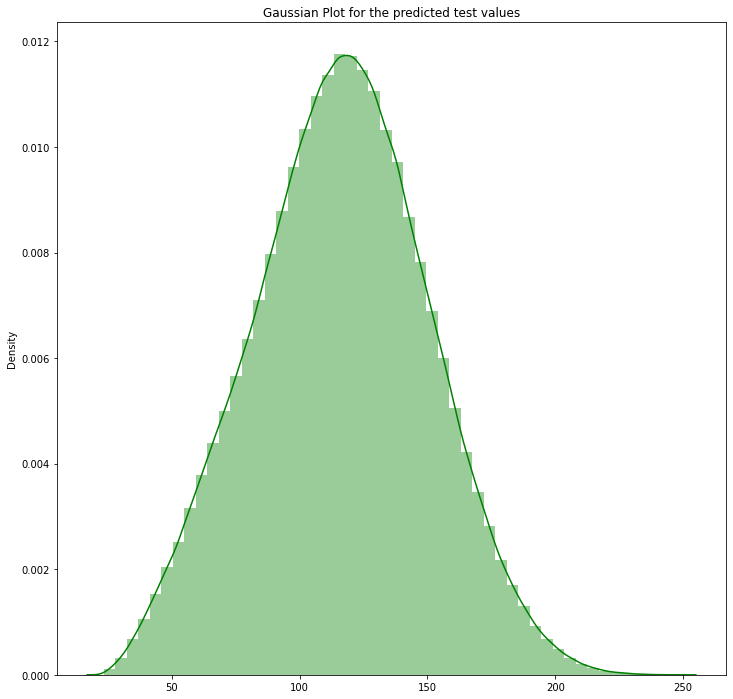

In [49]:

gaussianPlot(yhat)

In [59]:
filename = 'test_salaries.csv'
with open(filename, 'w') as f:
    writer = csv.writer(f, delimiter = ',')
    for i in range(len(jobIDs)):
        writer.writerow([jobIDs[i], yhat[i]])
